## Sentiment Analysis Of Twitter 

    Dataset
    From Kaggle 
    

##### Importing Library 

In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soumg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Set Up Cplumn

In [9]:
cols = ['target','id','date','flag','user','text']

##### Loading DataSet

In [10]:
dataset = pd.read_csv(r'C:\Users\soumg\Desktop\kaggledata.csv',encoding='ISO-8859-1',names=cols)

##### Read Dataset. first 10 data

In [11]:
dataset.head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


#### Checking data_shape

In [12]:
dataset.shape

(1048576, 6)

###### Check for missing values

In [16]:
dataset.isnull().any()

target    False
id        False
date      False
flag      False
user      False
text      False
dtype: bool

In [13]:
dataset.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [18]:
# We Can See there is NO NULL Value

##### Choose only the columns we use

In [14]:
dataset = dataset[['target','text']]
dataset.head(5)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### Count the Target

In [15]:
dataset['target'].value_counts()

0    800000
4    248576
Name: target, dtype: int64

##### There is no tweets with neutral "2"tag , So its binary classification problem now

([<matplotlib.axis.XTick at 0x10c0006bca0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

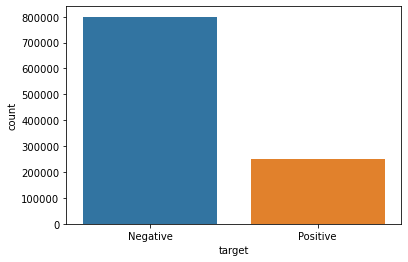

In [16]:
sns.countplot(data=dataset,x='target')
plt.xticks(ticks=[0,1],labels=['Negative','Positive'])

#### Replace Target 4 by 1

In [18]:
dataset['target'] = dataset['target'].replace(4,1)

##### Checking...

In [19]:
dataset['target'].unique()

array([0, 1], dtype=int64)

##### Let's Handle the text

In [20]:
# dictionary containing all emojis.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused',
          '$_$': 'greedy','@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused','<(-_-)>': 'robot', 'd[-_-]b': 'dj', 
          ":'-)": 'sadsmile',';)': 'wink',';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [21]:
# list containing all stopwords.
stopword =  ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves']

##### Function to clean the data.

In [22]:
# Function to clean the data.
def preprocess(text , wordLemm):
    processedText = []
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in text:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText
        

In [23]:
wordLemm = WordNetLemmatizer()
X = preprocess(list(dataset['text']),wordLemm)
y = dataset['target']

###### Spliting data to features and target

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [50]:
pd.DataFrame(X_train , y_train).info

<bound method DataFrame.info of                                                         0
target                                                   
0       my hand hurt it like norbit USER except invisi...
1       USER im taking advantage of twitter every chan...
0       the olson family ha been sick for several day ...
0       just accidentally ruined dollhouse for USER th...
0       USER only managed 20 minute because stuck at t...
...                                                   ...
0       this song middle change just doesn want to be ...
0       USER trying to reach my dream but it seems imp...
0                              USER rather average 32370 
0       pickin up USER waitin on USER hurry up odee mi...
0       home studying for math woot im so going to fai...

[838860 rows x 1 columns]>

#### Instantiate the TfidfVectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2), max_features=1000000,stop_words=stopword)

vect.fit(X_train)

TfidfVectorizer(max_features=1000000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'ain',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'by', 'can', 'd', 'did', 'do',
                            'does', 'doing', 'down', ...])

In [26]:
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

#### Now Going for Selecting a Model

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

#### Let's go for Evalution

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### Let's Plug Naive Bayes Classifier

In [29]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train,y_train)

nb_pred = nb_clf.predict(X_test)
print('Naive Bayes Accuracy :',accuracy_score(y_test,nb_pred))

Naive Bayes Accuracy : 0.7983940185775048


#### Logistic Regression Classifier

In [34]:
log_clf = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
log_clf.fit(X_train,y_train)

log_pred = log_clf.predict(X_test)
print('Logistic Regression Accuracy :',accuracy_score(y_test,log_pred))

Logistic Regression Accuracy : 0.857321329798394


#### XGBClassifier

In [31]:
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_clf.fit(X_train,y_train)

xgb_pred = xgb_clf.predict(X_test)
print('XGBClassifier Accuracy :',accuracy_score(y_test,xgb_pred))

XGBClassifier Accuracy : 0.818063476320357


#### Here We can see Logistic regression is more accurate than others

[[151195   8932]
 [ 20990  28599]]


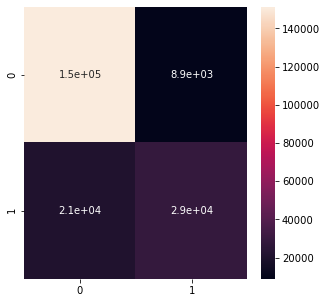

In [32]:
cm = confusion_matrix(y_test,log_pred)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.show()

##### Let's Print The Report

In [36]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    160127
           1       0.76      0.58      0.66     49589

    accuracy                           0.86    209716
   macro avg       0.82      0.76      0.78    209716
weighted avg       0.85      0.86      0.85    209716



##### Here's The Conclusion Of the sentiment of the Tweet !